C:\Users\akswa\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'spectral radius')

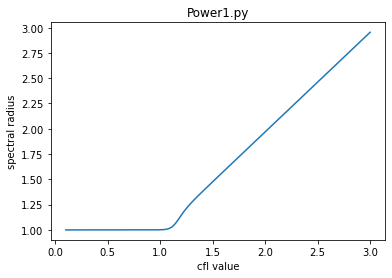

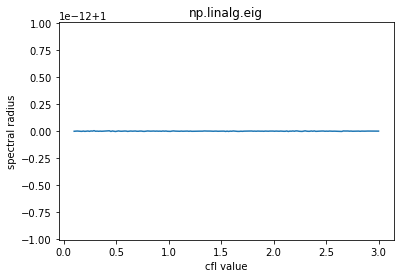

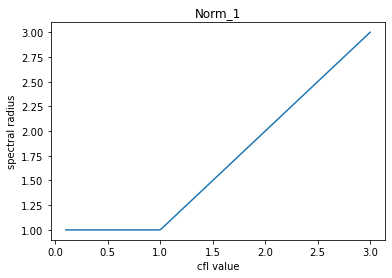

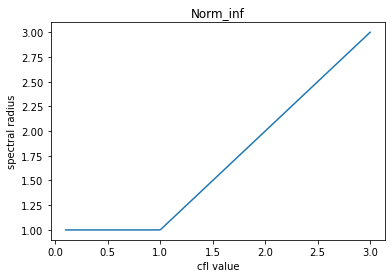

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue May  5 13:04:04 2020

@author: akswa
"""
import numpy as np
import matplotlib.pyplot as plt

# IMPORTANT
# Note that for the Lax scheme, 
# the cfl condition is satisfied iff abs(c*tau/h) <= 1
# according to the textbook on pg 221
N = 51


# Construct A
# pass it cfl = c*tau*h
def make_A(cfl):
    
    N = 51
    c = 1
    
    
    B = np.zeros((N,N))
    C = np.zeros((N,N))
    
    
    #Construct B diagonals
    b1 = np.diag(np.ones(N-1),k=1)
    b2 = np.diag(-np.ones(N-1),k=-1)
    B += b1 +b2
    # B corners
    B[-1,0] = 1
    B[0,-1] = -1
    
    # Construct C
    C = np.abs(B)
    
    
    A = .5*C - (cfl/2)*B
    return A

cfl_range = np.linspace(.1,3,200)
power_vals = []
numpy_vals = []
norm1_vals = []
norminf_vals = []

for cfl in cfl_range:
    #print(f"\n_________________\nusing cfl value: {cfl}")
    ###################################
    # Part A
    ###################################
    from power1 import power1
    
    A1 = make_A(cfl)
    x=np.array([[i for i in range(1,N+1)]]).T
    
    eigval, eigvec = power1(A1,x,1.0e-3,20)
    power_vals.append(eigval)
    
    #print(f"Max Eigval from power1: {eigval}")
    
    
    
    # Part B
    A2 = make_A(cfl)
    eigenvalue,eigenvector = np.linalg.eig(A2)
    # get max eigenvalue
    emax = np.max(eigenvalue)
    emax_index = np.argmax(eigenvalue)
    evmax = eigenvector[:,emax_index]
    numpy_vals.append(emax)
    #print(f"Max Eigval from np.linalg.eig: {emax}")

    # Part C
    A3 = make_A(cfl)
    norm1 = np.linalg.norm(A3,ord=1)
    norm1_vals.append(norm1)
    
    # Part d
    A4 = make_A(cfl)
    norminf = np.linalg.norm(A4,ord=np.inf)
    norminf_vals.append(norminf)
    
plt.figure(1)
plt.title("Power1.py")
plt.plot(cfl_range,power_vals)
plt.xlabel("cfl value")
plt.ylabel("spectral radius")

plt.figure(2)
plt.title("np.linalg.eig")
plt.plot(cfl_range,numpy_vals)
plt.xlabel("cfl value")
plt.ylabel("spectral radius")

plt.figure(3)
plt.title("Norm_1")
plt.plot(cfl_range,norm1_vals)
plt.xlabel("cfl value")
plt.ylabel("spectral radius")

plt.figure(4)
plt.title("Norm_inf")
plt.plot(cfl_range,norminf_vals)
plt.xlabel("cfl value")
plt.ylabel("spectral radius")